### 목표
- 환자데이터를 바탕으로 유방암인지 아닌지를 분류(이진분류)
- 딥러닝모델로 이진분류를 진행해보자!
  - 딥러닝 모델링은 변경사항이
- sklearn에서 제공하는 유방암 데이터 활용

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 사이킷런 내장데이터

In [30]:
data = load_breast_cancer()
data
# 번치객체 -> 딕셔너리처럼 사용
# data: 문제데이터
# target: 정답데이터
# target_names : 정답데이터의 이름  '0: malignant'(악성), 1: 'benign (양성)
# feature_names: 특성의 이름 (컬럼명)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
# 문제, 정답
X = data['data']
y = data['target']

In [32]:
# 훈련용, 평가용 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                    random_state = 24)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 총 30개의 특성을 가지고 있음

(398, 30) (398,)
(171, 30) (171,)


### 모델링
1. 신경망모델 구조 설계(뼈대생성, 입력층, 중간층, 출력층)
2. 신경망 모델 학습방법, 평가방법 설정(회귀, 이진분류, 다중분류를 진행하는지에 따라서 설정법이 달라진다!!)
3. 모델학습
4. 모델평가

In [34]:
# 모델 생성을 위한 도구 불러오기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation

In [35]:
# 1. 구조설계
# 뼈대
model = Sequential()
# 입력층 -> 입력특성의 개수(형태)를 정확하게 입력
model.add(InputLayer(input_shape=(30)))
# 중간층 (은닉층) -> 모델의 성능을 결정
model.add(Dense(units = 16, activation = 'sigmoid')) # 퍼셉트론 = 선형모델 + 활성화함수
model.add(Dense(units = 8, activation = 'sigmoid')) # 2층
# units : 선형모델 개수, activation: 활동화함수
# 출력층 -> 출력하고자하는 데이터의 형태 지정(이진 분류)
model.add(Dense(units = 1, activation = 'sigmoid'))
# 왜 1개의 선형모델을 더해줬을까?
# 이진분류를 하기위해서는 1개의 직선만 필요하기 때문
# 50%를 기준으로 이상 이하 인지만 판단하면 되기 때문
# 분류는 출력하는 값이 확률값(인지 아닌지) -> 0~1 사이의 값을 가진다
# 이진분류에서는 sigmoid함수 사용?

In [36]:
#2. 모델의 학습방법 및 평가방법 설정
model.compile(loss = 'binary_crossentropy',  # 오차: 이진분류는 binary_crossentropy
              optimizer ='Adam', # 최적화알고리즘 'Adam' SGD 발전한 친구중 하나
              metrics=['accuracy']) # 평가방법['정확도']

In [37]:
# 모델 학습 (반복횟수 100번)
h1= model.fit(X_train,y_train,
          validation_split = 0.2, # 훈련데이터 내에서 20%를 검증데이터로 활용
          epochs = 100) # 모델의 최적화 횟수 (w,b값 업데이트 횟수)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.8605 - accuracy: 0.3836 - val_loss: 0.8920 - val_accuracy: 0.3125
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8238 - accuracy: 0.3836 - val_loss: 0.8493 - val_accuracy: 0.3125
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.7950 - accuracy: 0.3836 - val_loss: 0.8149 - val_accuracy: 0.3125
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7678 - accuracy: 0.3836 - val_loss: 0.7859 - val_accuracy: 0.3125
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7449 - accuracy: 0.3836 - val_loss: 0.7593 - val_accuracy: 0.3125
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.3836 - val_loss: 0.7360 - val_accuracy: 0.3125
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7088 - accuracy: 0.3836 - val_loss: 0.7154 - val_accuracy: 0.3125
Epoch 8/100


In [38]:
# 모델평가
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.9181


[0.32402557134628296, 0.9181286692619324]

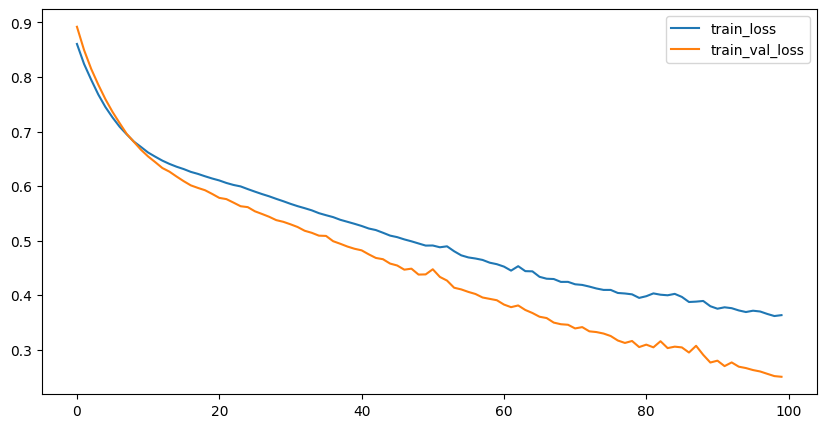

In [39]:
# 모델학습결과 시각화(loss, val_loss)
plt.figure(figsize = (10,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'train_val_loss')
plt.legend()
plt.show()

In [40]:
# 모델의 전체적인 내부구조 확인
model.summary()
# 층의 구조를 확인가능
# 3개의 층으로 구성됨
# 중간층 2개, 출력층 1개

# 계산해볼 필요는 없고 어떻게 계산되는지 정도만 확인

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                496       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
